In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv(r"C:\Users\admin\Downloads\Occupancy.csv")
data.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
0,2015-02-02 14:19:00,23.7000,26.272,585.200000,749.200000,0.004764,1
1,2015-02-02 14:19:59,23.7180,26.290,578.400000,760.400000,0.004773,1
2,2015-02-02 14:21:00,23.7300,26.230,572.666667,769.666667,0.004765,1
3,2015-02-02 14:22:00,23.7225,26.125,493.750000,774.750000,0.004744,1
4,2015-02-02 14:23:00,23.7540,26.200,488.600000,779.000000,0.004767,1


<AxesSubplot:>

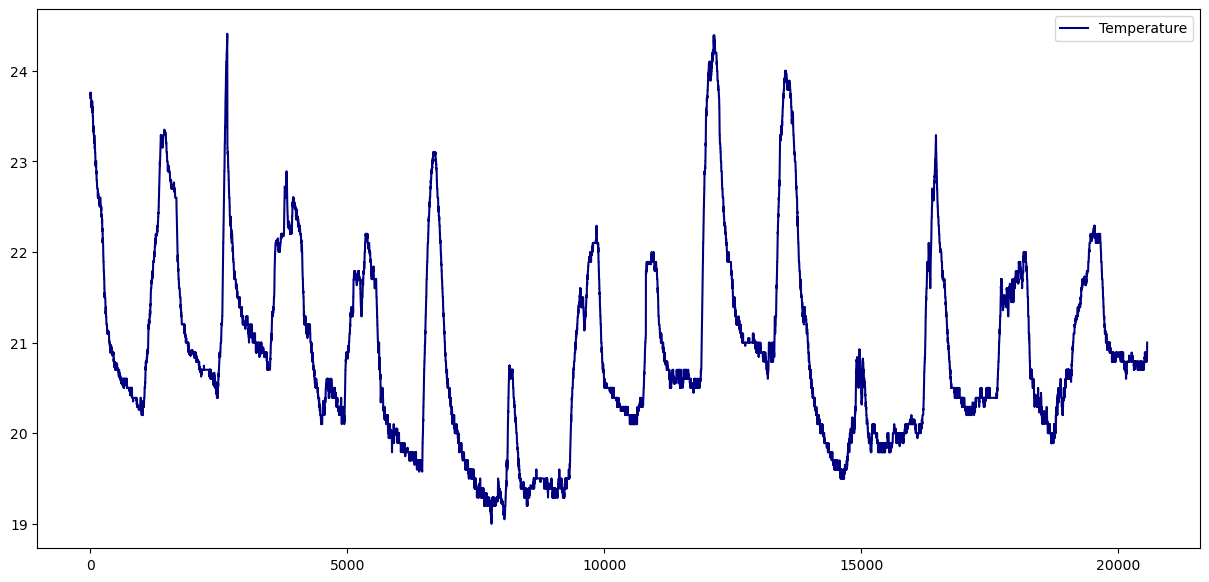

In [28]:
data_new=data.drop(columns=["Humidity","Light","CO2","HumidityRatio","Occupancy"])
from pylab import rcParams
rcParams['figure.figsize'] = 15, 7
data_new.plot(c="navy")

In [29]:
from statsmodels.tsa.stattools import adfuller

def ADF(sales):
    result=adfuller(sales)
    labels = ['Test Statistic','p-value','#Lags Used','Observations']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )

    if result[1] <= 0.05:
        print("Stationary")
    else:
        print("Non-stationary ")

ADF(data['Temperature'])

Test Statistic : -5.163674947175168
p-value : 1.0424394238534603e-05
#Lags Used : 45
Observations : 20514
Stationary


In [30]:
ADF(data["Humidity"])

Test Statistic : -2.3705839385152667
p-value : 0.15021155107542283
#Lags Used : 44
Observations : 20515
Non-stationary 


In [31]:
ADF(data["Light"])

Test Statistic : -6.132988262562137
p-value : 8.315153188951086e-08
#Lags Used : 28
Observations : 20531
Stationary


In [32]:
ADF(data["CO2"])

Test Statistic : -2.556927987349531
p-value : 0.10223008057022887
#Lags Used : 32
Observations : 20527
Non-stationary 


In [33]:
ts_data=data.drop(columns=["Humidity","CO2"])
ts_data.head(3)

,date,Temperature,Light,HumidityRatio,Occupancy
0,2015-02-02 14:19:00,23.700,585.200000,0.004764,1
1,2015-02-02 14:19:59,23.718,578.400000,0.004773,1
2,2015-02-02 14:21:00,23.730,572.666667,0.004765,1


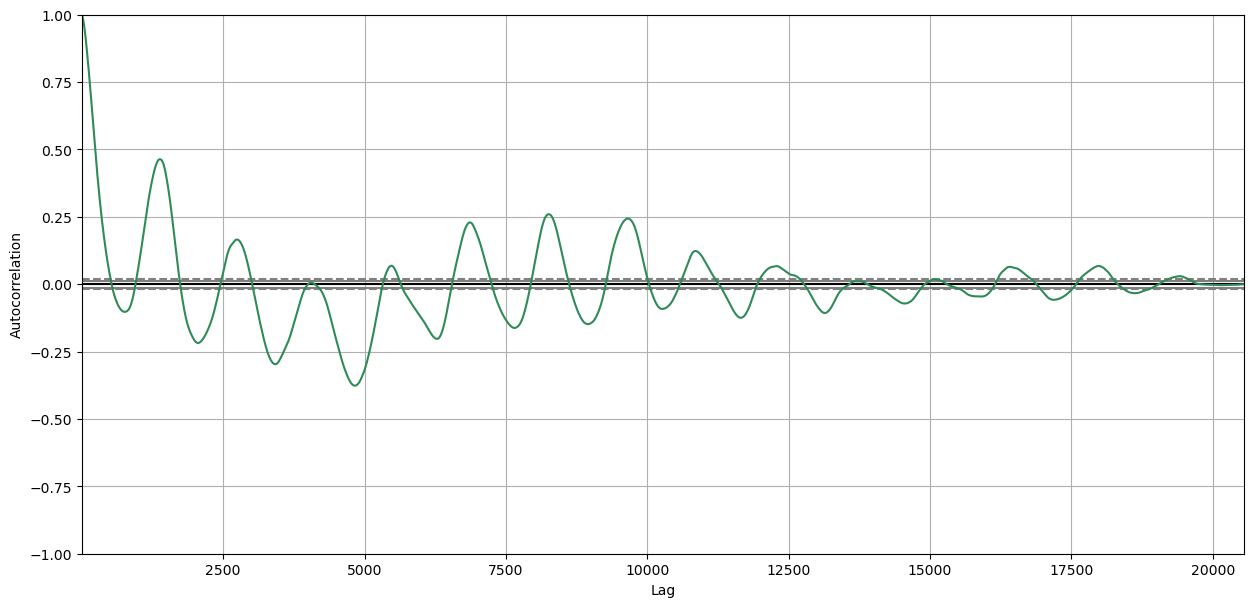

In [34]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(data['Temperature'],c="seagreen")
plt.show()

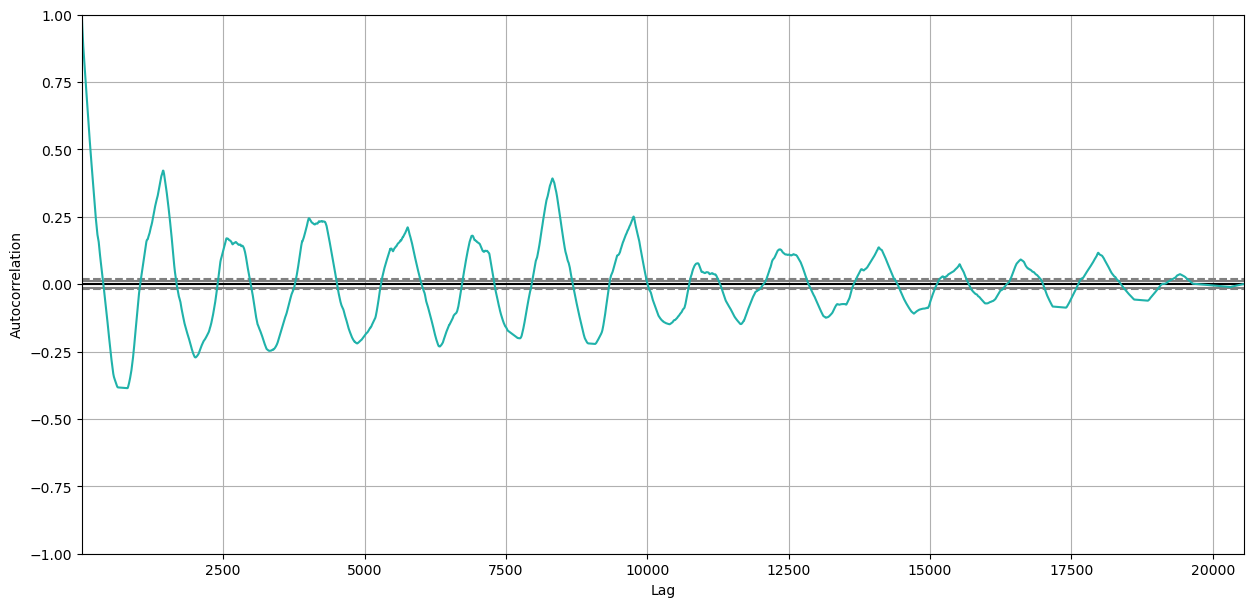

In [35]:
autocorrelation_plot(data["Light"],c="lightseagreen")
plt.show()

In [38]:
data["Temp First Diff"] = data["Temperature"] - data["Temperature"].shift(1)
data["Temp Seasonal First Diff"]=data["Temperature"]-data["Temperature"].shift(12)

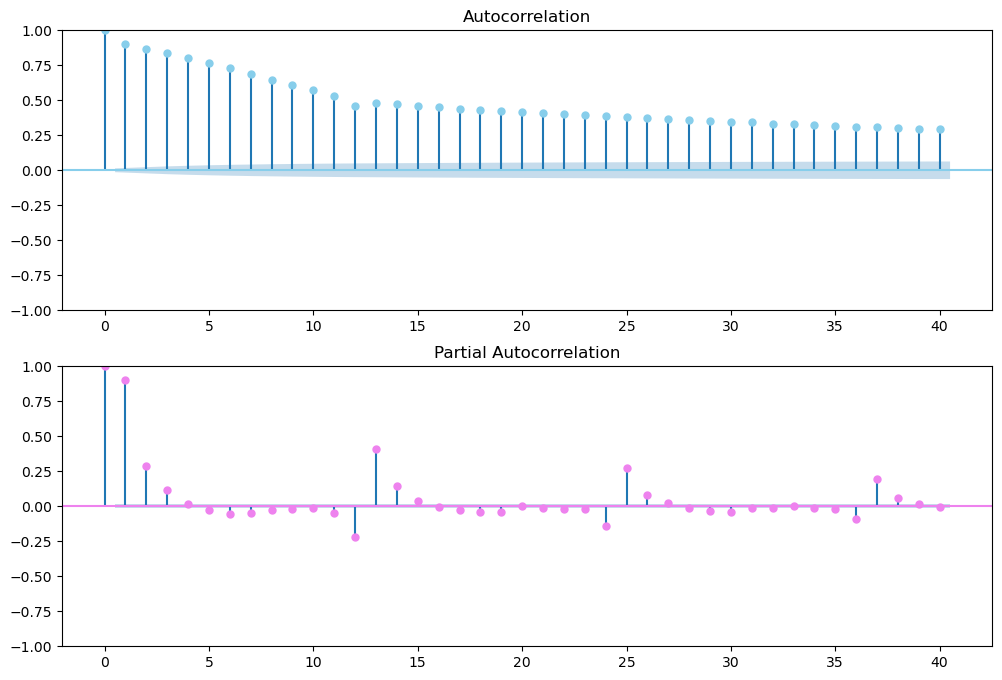

In [40]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(data['Temp Seasonal First Diff'].dropna(),lags=40,ax=ax1,c="skyblue")
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(data['Temp Seasonal First Diff'].dropna(),lags=40,ax=ax2,c="violet")

In [25]:
#from statsmodels.tsa.arima_model import ARIMA
#import statsmodels.tsa.arima.model.ARIMA
model=ARIMA(data["Temperature"],order=(1,1,1))
model_fit=model.fit()
model_fit.summary()

ModuleNotFoundError: No module named 'statsmodels.tsa.arima.model.ARIMA'; 'statsmodels.tsa.arima.model' is not a package

In [46]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX(data["Temperature"], order = (0, 1, 1), seasonal_order =(2, 1, 1, 12))
  
result = model.fit()
result.summary()

C:\Users\admin\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                        Temperature   No. Observations:                20560
Model:             SARIMAX(0, 1, 1)x(2, 1, 1, 12)   Log Likelihood               41625.925
Date:                            Sun, 16 Apr 2023   AIC                         -83241.851
Time:                                    15:20:48   BIC                         -83202.199
Sample:                                         0   HQIC                        -83228.895
                                          - 20560                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.2945      0.002   -155.412      0.000      -0.298      -0.291
ar.S.L12       0.0781      0.005     15.088      0.000       0.068       0.088
ar.S.L24       0.0558      0.006      9.624      0.000       0.044       0.067
ma.S.L12      -0.9994      0.002   -601.759      0.000      -1.003      -0.996
sigma2         0.0010   2.03e-06    499.330      0.000       0.001       0.001
===================================================================================
Ljung-Box (L1) (Q):                   7.95   Jarque-Bera (JB):          11093910.77
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.92   Skew:                            -2.32
Prob(H) (two-sided):                  0.00   Kurtosis:                       116.74
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""